In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from keras.applications import InceptionResNetV2

In [2]:
import os
import shutil

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"benyahu","key":"8a70e80212b78c26a36c0a80bf1abe20"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 97% 791M/812M [00:03<00:00, 224MB/s]
100% 812M/812M [00:03<00:00, 254MB/s]


In [6]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [7]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [8]:
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [9]:
# Path to the directory containing images
train_dir = '/content/train'

# Loop through files in the 'train' directory
for filename in os.listdir(train_dir):
    if 'cat' in filename:
      os.makedirs(os.path.join(train_dir, 'cats'),exist_ok=True)
      shutil.move(os.path.join(train_dir, filename), os.path.join(train_dir, 'cats', filename))
    elif 'dog' in filename:
      os.makedirs(os.path.join(train_dir, 'dogs'),exist_ok=True)
      shutil.move(os.path.join(train_dir, filename), os.path.join(train_dir, 'dogs', filename))

In [10]:
# List to store image paths and corresponding labels (assuming binary classification)
image_paths = []
labels = []

# Loop through the directory to get image paths and labels
for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)
    for image_file in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_file)
        image_paths.append(image_path)
        labels.append(label)  # Assuming directory names represent labels

In [11]:
X_train,X_test,y_train,y_test=train_test_split(image_paths,labels,random_state=28)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,random_state=28)

In [12]:
print(' Length of X_train:',len(X_train),'\t','y_train:',len(y_train),
      '\n','Length of X_valid:',len(X_valid),'\t','y_valid:',len(y_valid),
      '\n','Length of X_test:',len(X_test),'\t','y_test:',len(y_test))

 Length of X_train: 14062 	 y_train: 14062 
 Length of X_valid: 4688 	 y_valid: 4688 
 Length of X_test: 6250 	 y_test: 6250


In [13]:
data = []  # Create an empty list to store the pairs

for x, y in zip(X_train, y_train):
    data.append((str(x), str(y)))

for path,label in data:
  formatted_path=path.ljust(40)
  print(f"{formatted_path}{label}")

Streaming output truncated to the last 5000 lines.
/content/train/cats/cat.9671.jpg        cats
/content/train/dogs/dog.10795.jpg       dogs
/content/train/dogs/dog.2945.jpg        dogs
/content/train/cats/cat.4272.jpg        cats
/content/train/cats/cat.6191.jpg        cats
/content/train/cats/cat.4108.jpg        cats
/content/train/cats/cat.7799.jpg        cats
/content/train/cats/cat.4549.jpg        cats
/content/train/cats/cat.6364.jpg        cats
/content/train/cats/cat.9221.jpg        cats
/content/train/cats/cat.3916.jpg        cats
/content/train/cats/cat.205.jpg         cats
/content/train/dogs/dog.3174.jpg        dogs
/content/train/cats/cat.4853.jpg        cats
/content/train/dogs/dog.116.jpg         dogs
/content/train/cats/cat.6187.jpg        cats
/content/train/dogs/dog.2749.jpg        dogs
/content/train/cats/cat.8358.jpg        cats
/content/train/dogs/dog.6437.jpg        dogs
/content/train/dogs/dog.5837.jpg        dogs
/content/train/cats/cat.5500.jpg        cats
/con

In [14]:
# Assuming X_train, X_valid, and X_test are lists of image paths
# and y_train, y_valid, and y_test are lists of corresponding labels

# Creating DataFrames from the lists
train_df = pd.DataFrame({'path': X_train, 'label': y_train})
valid_df = pd.DataFrame({'path': X_valid, 'label': y_valid})
test_df = pd.DataFrame({'path': X_test, 'label': y_test})

# Creating ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 14062 validated image filenames belonging to 2 classes.
Found 4688 validated image filenames belonging to 2 classes.
Found 6250 validated image filenames belonging to 2 classes.


In [ ]:
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
model_history=model.fit(train_generator,
                        steps_per_epoch=440,
                        epochs=100,
                        validation_data=valid_generator,
                        validation_steps=147)

Epoch 1/100
440/440 [==============================] - 998s 2s/step - loss: 0.6833 - acc: 0.5543 - val_loss: 0.6487 - val_acc: 0.6224
Epoch 2/100
440/440 [==============================] - 907s 2s/step - loss: 0.6521 - acc: 0.6153 - val_loss: 0.6112 - val_acc: 0.6677
Epoch 3/100
440/440 [==============================] - 866s 2s/step - loss: 0.6220 - acc: 0.6510 - val_loss: 0.5653 - val_acc: 0.7127
Epoch 4/100
440/440 [==============================] - 839s 2s/step - loss: 0.5995 - acc: 0.6732 - val_loss: 0.5314 - val_acc: 0.7363
Epoch 5/100
440/440 [==============================] - 826s 2s/step - loss: 0.5783 - acc: 0.6900 - val_loss: 0.5184 - val_acc: 0.7404
Epoch 6/100
440/440 [==============================] - 808s 2s/step - loss: 0.5652 - acc: 0.7050 - val_loss: 0.6957 - val_acc: 0.6429
Epoch 7/100
 26/440 [>.............................] - ETA: 12:40 - loss: 0.5507 - acc: 0.7079

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(7,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
predictions=model.evaluate(test_generator,steps=196)
predictions

In [ ]:
model.save('model_secondrun.h5')

In [ ]:
K.clear_session()
del model

##**Using transfer learning**

In [15]:
conv_base=InceptionResNetV2(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

219055592/219055592 [==============================] - 1s 0us/step


In [16]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_norm

In [17]:
model=keras.models.Sequential()

model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [19]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('CNN-ProjectModel-{epoch:02d}.h5',save_best_only=True)

In [21]:
model_history=model.fit(train_generator,
                        steps_per_epoch=440,
                        epochs=10,
                        validation_data=valid_generator,
                        validation_steps=147,
                        callbacks=[checkpoint_cb])

Epoch 1/10
440/440 [==============================] - 145s 329ms/step - loss: 0.0566 - acc: 0.9793 - val_loss: 0.7349 - val_acc: 0.9727
Epoch 2/10
440/440 [==============================] - 148s 336ms/step - loss: 0.0519 - acc: 0.9819 - val_loss: 0.3486 - val_acc: 0.9761
Epoch 3/10
440/440 [==============================] - 144s 327ms/step - loss: 0.0467 - acc: 0.9837 - val_loss: 0.4731 - val_acc: 0.9770
Epoch 4/10
440/440 [==============================] - 146s 332ms/step - loss: 0.0480 - acc: 0.9826 - val_loss: 0.3237 - val_acc: 0.9765
Epoch 5/10
440/440 [==============================] - 144s 327ms/step - loss: 0.0458 - acc: 0.9839 - val_loss: 0.3933 - val_acc: 0.9765
Epoch 6/10
440/440 [==============================] - 144s 327ms/step - loss: 0.0392 - acc: 0.9854 - val_loss: 0.3053 - val_acc: 0.9776
Epoch 7/10
440/440 [==============================] - 145s 328ms/step - loss: 0.0358 - acc: 0.9883 - val_loss: 0.3647 - val_acc: 0.9780
Epoch 8/10
440/440 [============================

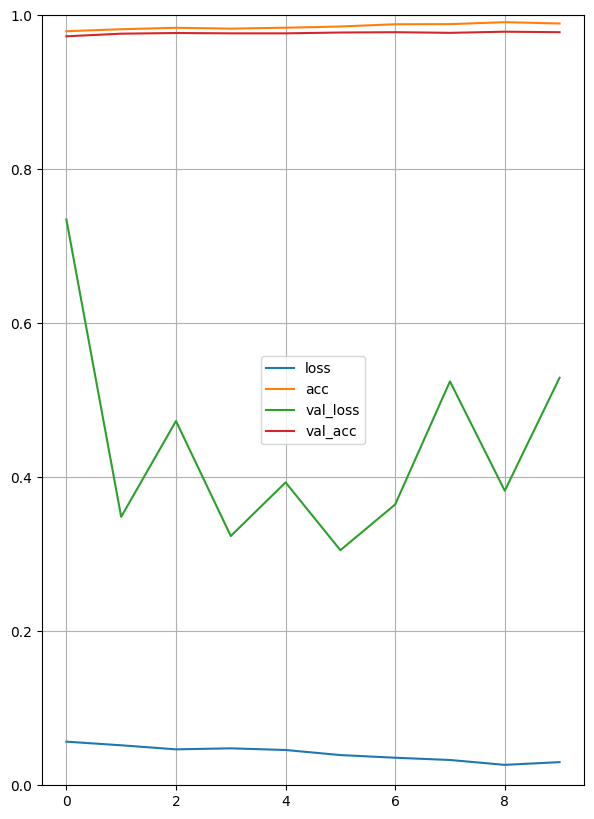

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(7,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
predictions=model.evaluate(test_generator,steps=196)
predictions

196/196 [==============================] - 17s 87ms/step - loss: 0.6445 - acc: 0.9765


[0.6445493102073669, 0.9764800071716309]